In [1]:
# Loading the housing Data from training set

import pandas as pd

housing_df = pd.read_csv("train.csv")

X = housing_df.drop(columns = ["SalePrice"])

y = housing_df["SalePrice"]

ML_algorithms = []

In [2]:
# Description of each attribute

with open ("data_description.txt") as description_file:
    lines = description_file.readlines()
    for line in lines:
        print(line)


MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [3]:
print(X.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# DataWrangling

selected_columns = ['MSSubClass', 'LotArea', 'Alley', 'Utilities', 'Neighborhood', 'Condition1', 'Condition2',
                   'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                    'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'TotRmsAbvGrd',
                   'Functional', 'FireplaceQu', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                    'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']

X = X.loc[:, selected_columns]

porch_columns = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

X["PorchArea"] = X.loc[:, porch_columns].sum(axis=1)

X.drop(columns = porch_columns, inplace = True)

X.head()



,MSSubClass,LotArea,Alley,Utilities,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,FireplaceQu,GarageQual,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,PorchArea
0,60,8450,NaN,AllPub,CollgCr,Norm,Norm,2Story,7,5,...,NaN,TA,0,NaN,NaN,0,2,2008,WD,61
1,20,9600,NaN,AllPub,Veenker,Feedr,Norm,1Story,6,8,...,TA,TA,0,NaN,NaN,0,5,2007,WD,298
2,60,11250,NaN,AllPub,CollgCr,Norm,Norm,2Story,7,5,...,TA,TA,0,NaN,NaN,0,9,2008,WD,42
3,70,9550,NaN,AllPub,Crawfor,Norm,Norm,2Story,7,5,...,Gd,TA,0,NaN,NaN,0,2,2006,WD,307
4,60,14260,NaN,AllPub,NoRidge,Norm,Norm,2Story,8,5,...,TA,TA,0,NaN,NaN,0,12,2008,WD,276


In [5]:
for column in X.columns:
    print(column, X.loc[:, column].isnull().sum())

MSSubClass 0
LotArea 0
Alley 1369
Utilities 0
Neighborhood 0
Condition1 0
Condition2 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
ExterQual 0
ExterCond 0
BsmtQual 37
BsmtCond 37
HeatingQC 0
CentralAir 0
1stFlrSF 0
2ndFlrSF 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
FireplaceQu 690
GarageQual 81
PoolArea 0
PoolQC 1453
Fence 1179
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
PorchArea 0


In [6]:
# "Fence", "FireplaceQu" "Alley" have large porportions of Missing Data and cannot be considered as a significant determinant of
# housing price

X.drop(columns = ['Fence', 'Alley', 'FireplaceQu'], inplace = True)

X["GardenArea"] = X["LotArea"] - X["1stFlrSF"]

# Getting rid of repeated features

X.drop(columns = ["LotArea"], inplace = True)

# MSsubclass can be represented by ['YearBuilt', 'YearRemodAdd'] and ['HouseStyle'] columns
        
X.drop(columns = ["MSSubClass"], inplace = True)
    

In [7]:
print(X.keys())

Index(['Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageQual', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'PorchArea', 'GardenArea'],
      dtype='object')


In [8]:
# Storey is accounted by 'Housestyle'

X["IndoorArea"] = X['1stFlrSF'] + X['2ndFlrSF']

X.drop(columns = ['1stFlrSF', '2ndFlrSF'], inplace = True)

# Convert Binary categorical data into 0 and 1s

X["CentralAir"] = X["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)

# Convert categorical data with multivariables to binary

X_copy1 = X.copy()

multivar_columns = ["Utilities", "Neighborhood", "Condition1", "Condition2", "HouseStyle", 
                    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", 
                    "Functional", "GarageQual", "PoolQC", "SaleType"]

for column in multivar_columns:
    category_list = list(X[column].value_counts().index)
    for category in category_list:
        X[column + category] = (X[column] == category).astype(int)
        
X.drop(columns = multivar_columns, inplace = True)

/var/folders/x0/x0xdjkzs0zbclzn30ldtpcy00000gn/T/ipykernel_87860/1943519377.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[column + category] = (X[column] == category).astype(int)
/var/folders/x0/x0xdjkzs0zbclzn30ldtpcy00000gn/T/ipykernel_87860/1943519377.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[column + category] = (X[column] == category).astype(int)
/var/folders/x0/x0xdjkzs0zbclzn30ldtpcy00000gn/T/ipykernel_87860/1943519377.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

In [9]:
# Check if all Nan data has been eliminated 

for column in X.columns:
    print(column, X.loc[:, column].isnull().sum())

OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
CentralAir 0
TotRmsAbvGrd 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
PorchArea 0
GardenArea 0
IndoorArea 0
UtilitiesAllPub 0
UtilitiesNoSeWa 0
NeighborhoodNAmes 0
NeighborhoodCollgCr 0
NeighborhoodOldTown 0
NeighborhoodEdwards 0
NeighborhoodSomerst 0
NeighborhoodGilbert 0
NeighborhoodNridgHt 0
NeighborhoodSawyer 0
NeighborhoodNWAmes 0
NeighborhoodSawyerW 0
NeighborhoodBrkSide 0
NeighborhoodCrawfor 0
NeighborhoodMitchel 0
NeighborhoodNoRidge 0
NeighborhoodTimber 0
NeighborhoodIDOTRR 0
NeighborhoodClearCr 0
NeighborhoodStoneBr 0
NeighborhoodSWISU 0
NeighborhoodMeadowV 0
NeighborhoodBlmngtn 0
NeighborhoodBrDale 0
NeighborhoodVeenker 0
NeighborhoodNPkVill 0
NeighborhoodBlueste 0
Condition1Norm 0
Condition1Feedr 0
Condition1Artery 0
Condition1RRAn 0
Condition1PosN 0
Condition1RRAe 0
Condition1PosA 0
Condition1RRNn 0
Condition1RRNe 0
Condition2Norm 0
Condition2Feedr 0
Condition2Artery 0
Condition2RRNn 0
Condition2PosN 0
Condition2PosA 0
Co

In [10]:
# Perform feature scaling/normalisation for numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = ['PoolArea', 'GardenArea', 'IndoorArea']

X_numeric = X[numeric_columns]

X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_numeric.head()

,PoolArea,GardenArea,IndoorArea
0,0,7594,1710
1,0,8338,1262
2,0,10330,1786
3,0,8589,1717
4,0,13115,2198


In [11]:
# Ready to start employing regression techniques

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

lm.intercept_, 

(-850499.9553104619,)

In [12]:
# Check performance of linear regression

from sklearn.metrics import mean_squared_error

y_pred = lm.predict(X_test)

r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('R2', r2)
print('MSE', mse)

ML_algorithms.append(f'linear regression (w Pool Attributes): r2 = {r2}')

R2 0.828068916896793
MSE 1318767492.556597


Text(0.5, 1.0, 'Linear Regression')

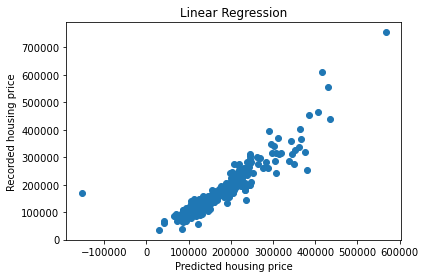

In [13]:
from matplotlib import pyplot as plt

plt.scatter(y_pred, y_test)

plt.xlabel("Predicted housing price")
plt.ylabel("Recorded housing price")
plt.title("Linear Regression")

In [14]:
# Identify the outlier and find what caused the negative pricing

for i in range(len(y_pred)):
    if y_pred[i] < 0:
        outlier = i
        
X_test.reset_index(drop = True, inplace = True)

In [15]:
for column in X_test.columns:
    print(f'{column} : {X_test.at[outlier, column]}')

OverallQual : 6
OverallCond : 6
YearBuilt : 1977
YearRemodAdd : 1977
CentralAir : 1
TotRmsAbvGrd : 6
PoolArea : 14.272671710686874
MiscVal : 0
MoSold : 7
YrSold : 2008
PorchArea : 203
GardenArea : -0.06000620100547757
IndoorArea : -0.7516899129902972
UtilitiesAllPub : 1
UtilitiesNoSeWa : 0
NeighborhoodNAmes : 0
NeighborhoodCollgCr : 0
NeighborhoodOldTown : 0
NeighborhoodEdwards : 0
NeighborhoodSomerst : 0
NeighborhoodGilbert : 0
NeighborhoodNridgHt : 0
NeighborhoodSawyer : 0
NeighborhoodNWAmes : 0
NeighborhoodSawyerW : 0
NeighborhoodBrkSide : 0
NeighborhoodCrawfor : 0
NeighborhoodMitchel : 1
NeighborhoodNoRidge : 0
NeighborhoodTimber : 0
NeighborhoodIDOTRR : 0
NeighborhoodClearCr : 0
NeighborhoodStoneBr : 0
NeighborhoodSWISU : 0
NeighborhoodMeadowV : 0
NeighborhoodBlmngtn : 0
NeighborhoodBrDale : 0
NeighborhoodVeenker : 0
NeighborhoodNPkVill : 0
NeighborhoodBlueste : 0
Condition1Norm : 1
Condition1Feedr : 0
Condition1Artery : 0
Condition1RRAn : 0
Condition1PosN : 0
Condition1RRAe : 0
C

In [16]:
outlier_value = []

for i in range(len(lm.coef_)):
    outlier_value.append(lm.coef_[i] * X_test.iat[outlier, i])

for i in range(len(lm.coef_)):
    print(X_test.keys()[i], outlier_value[i])
    

OverallQual 52447.41472083688
OverallCond 34745.58863009396
YearBuilt 792549.9165000546
YearRemodAdd 59330.08326624346
CentralAir 3698.059687689787
TotRmsAbvGrd 302.69500826697185
PoolArea 983606.2726169792
MiscVal 0.0
MoSold -4216.760661714805
YrSold 19344.619983131473
PorchArea 5608.7055828028715
GardenArea -422.749454018401
IndoorArea -28650.351954770784
UtilitiesAllPub 11460.905961772587
UtilitiesNoSeWa -0.0
NeighborhoodNAmes -0.0
NeighborhoodCollgCr 0.0
NeighborhoodOldTown -0.0
NeighborhoodEdwards -0.0
NeighborhoodSomerst 0.0
NeighborhoodGilbert -0.0
NeighborhoodNridgHt 0.0
NeighborhoodSawyer -0.0
NeighborhoodNWAmes -0.0
NeighborhoodSawyerW -0.0
NeighborhoodBrkSide 0.0
NeighborhoodCrawfor 0.0
NeighborhoodMitchel -15755.82254739757
NeighborhoodNoRidge 0.0
NeighborhoodTimber -0.0
NeighborhoodIDOTRR -0.0
NeighborhoodClearCr 0.0
NeighborhoodStoneBr 0.0
NeighborhoodSWISU -0.0
NeighborhoodMeadowV -0.0
NeighborhoodBlmngtn -0.0
NeighborhoodBrDale -0.0
NeighborhoodVeenker 0.0
NeighborhoodN

In [17]:
# Odd result for the coefficients of pool attributes: might be caused by the lack of sample with pools OR overfitting

# PoolQCGd -1280296.9583799648
# PoolQCEx -813503.1214910083
# PoolQCFa -1013597.3278249955


R2 0.8938355017545899
MSE 633223498.3278052


Text(0.5, 1.0, 'Linear Regression')

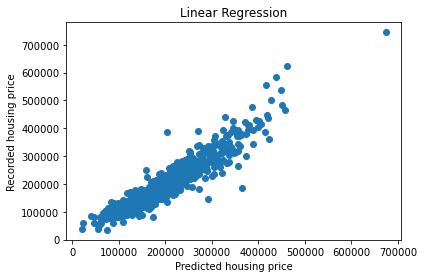

In [18]:
# Examine the performance on the training set to assess overfitting

train_pred = lm.predict(X_train)

r2 = lm.score(X_train, y_train)
mse = mean_squared_error(y_train, train_pred)

print('R2', r2)
print('MSE', mse)

plt.scatter(train_pred, y_train)

plt.xlabel("Predicted housing price")
plt.ylabel("Recorded housing price")
plt.title("Linear Regression")

In [19]:
# Similar R2 scores so no overfitting

print(X_train["PoolQCGd"].sum())
print(X_train["PoolQCEx"].sum())
print(X_train["PoolQCFa"].sum())

2
2
2


In [20]:
# Since the pool attributes have a very small sample space it can be dropped

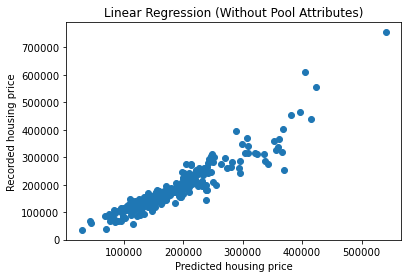

test set:
r2 0.8674990904411798
mse 1016325199.0651495
training set:
r2 0.8624484592630371
mse 820433094.5406691


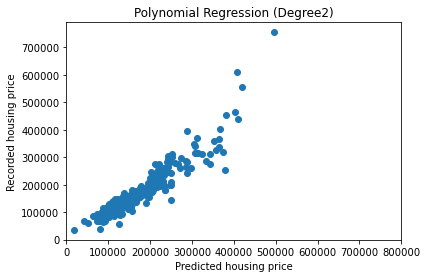

test set:
r2 0.8576694570054582
mse 1091721694.0142086
training set:
r2 0.8694871871068142
mse 778450247.7069681


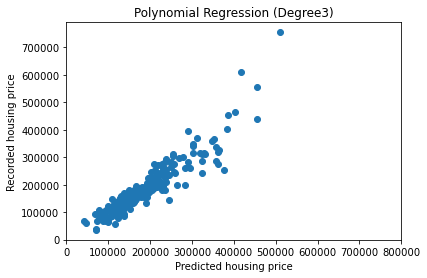

test set:
r2 0.860934031960767
mse 1066681339.1791759
training set:
r2 0.8952271919978821
mse 624922691.7586534


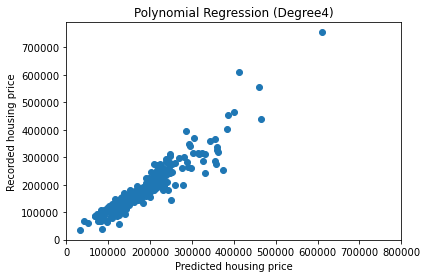

test set:
r2 0.8775936891664484
mse 938896333.9116842
training set:
r2 0.9037549865157115
mse 574058231.7287298


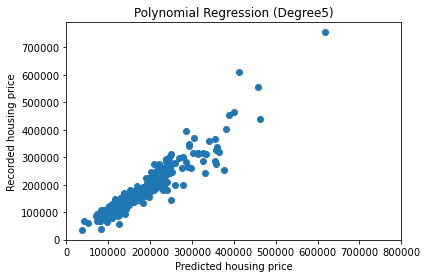

test set:
r2 0.879055790688581
mse 927681538.2889022
training set:
r2 0.9038588758416536
mse 573438578.610228


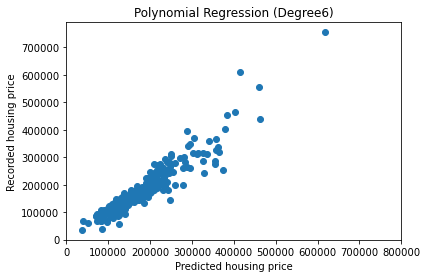

test set:
r2 0.8799551618436808
mse 920783068.1479516
training set:
r2 0.9041517265778877
mse 571691855.6402069


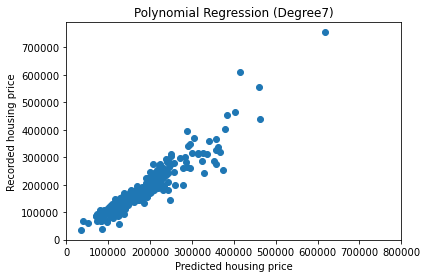

test set:
r2 0.8798221671209544
mse 921803181.0550983
training set:
r2 0.904226467978006
mse 571246056.7937465


In [21]:
# Since the previous data was not exposed to a significiant level of overfitting, we can try polynomial regression

# Drop the Pool columns

X.drop(columns = ["PoolArea", "PoolQCGd", "PoolQCEx", "PoolQCFa"], inplace = True)
numeric_columns.remove("PoolArea")

# Perfrom Linear Regression with Pool attributes dropped

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# Creating a copy for other ML Algorithms

X_copy = X.copy()
X_train_copy, X_test_copy = X_train.copy(), X_test.copy()
    
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
    
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted housing price")
plt.ylabel("Recorded housing price")
plt.title(f"Linear Regression (Without Pool Attributes)")

plt.show()
    
r2 = lm.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
    
print("test set:")
print("r2", r2)
print("mse", mse)

ML_algorithms.append(f'linear regression : r2 = {r2}')

train_pred = lm.predict(X_train)
    
r2 = lm.score(X_train, y_train)
mse = mean_squared_error(y_train, train_pred)
    
print("training set:")
print("r2", r2)
print("mse", mse)

# Polynomial Regression without Pool Attributes

for degree in range(2, 8):
    numeric_list = []
    for column in numeric_columns:
        X[f'{column}^{degree}'] = X_numeric[column] ** degree
        numeric_list.append(f'{column}^{degree}')
        
    scaler = StandardScaler()
    
    X[numeric_list] = scaler.fit_transform(X[numeric_list]) 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted housing price")
    plt.ylabel("Recorded housing price")
    plt.title(f"Polynomial Regression (Degree{degree})")
    plt.xlim(0, 800000)
    
    plt.show()
    
    r2 = lm.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print("test set:")
    print("r2", r2)
    print("mse", mse)
                     
    ML_algorithms.append(f'polynomial regression (Degree{degree}): r2 = {r2}')
    
    train_pred = lm.predict(X_train)
    
    r2 = lm.score(X_train, y_train)
    mse = mean_squared_error(y_train, train_pred)
    
    print("training set:")
    print("r2", r2)
    print("mse", mse)
    
    

2022-04-29 00:05:20.392999: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-29 00:05:20.486690: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
59/59 [==============================] - 1s 2ms/step - loss: 38888771584.0000
Epoch 2/300
59/59 [==============================] - 0s 1ms/step - loss: 38805086208.0000
Epoch 3/300
59/59 [==============================] - 0s 1ms/step - loss: 38466150400.0000
Epoch 4/300
59/59 [==============================] - 0s 1ms/step - loss: 37722214400.0000
Epoch 5/300
59/59 [==============================] - 0s 1ms/step - loss: 36548427776.0000
Epoch 6/300
59/59 [==============================] - 0s 1ms/step - loss: 34845302784.0000
Epoch 7/300
59/59 [==============================] - 0s 1ms/step - loss: 32522342400.0000
Epoch 8/300
59/59 [==============================] - 0s 2ms/step - loss: 29540644864.0000
Epoch 9/300
59/59 [==============================] - 0s 2ms/step - loss: 25938739200.0000
Epoch 10/300
59/59 [==============================] - 0s 2ms/step - loss: 21886470144.0000
Epoch 11/300
59/59 [==============================] - 0s 1ms/step - loss: 17716291584.0000
Epoch 12

Epoch 92/300
59/59 [==============================] - 0s 2ms/step - loss: 4915981824.0000
Epoch 93/300
59/59 [==============================] - 0s 2ms/step - loss: 4909361664.0000
Epoch 94/300
59/59 [==============================] - 0s 2ms/step - loss: 4902133760.0000
Epoch 95/300
59/59 [==============================] - 0s 2ms/step - loss: 4900679168.0000
Epoch 96/300
59/59 [==============================] - 0s 1ms/step - loss: 4892441088.0000
Epoch 97/300
59/59 [==============================] - 0s 1ms/step - loss: 4891353088.0000
Epoch 98/300
59/59 [==============================] - 0s 1ms/step - loss: 4888306176.0000
Epoch 99/300
59/59 [==============================] - 0s 1ms/step - loss: 4878819328.0000
Epoch 100/300
59/59 [==============================] - 0s 1ms/step - loss: 4875450368.0000
Epoch 101/300
59/59 [==============================] - 0s 1ms/step - loss: 4868215808.0000
Epoch 102/300
59/59 [==============================] - 0s 1ms/step - loss: 4862937088.0000
Epoch 1

59/59 [==============================] - 0s 1ms/step - loss: 4649657344.0000
Epoch 183/300
59/59 [==============================] - 0s 1ms/step - loss: 4648445952.0000
Epoch 184/300
59/59 [==============================] - 0s 1ms/step - loss: 4651172352.0000
Epoch 185/300
59/59 [==============================] - 0s 1ms/step - loss: 4645504000.0000
Epoch 186/300
59/59 [==============================] - 0s 1ms/step - loss: 4646279680.0000
Epoch 187/300
59/59 [==============================] - 0s 1ms/step - loss: 4640398336.0000
Epoch 188/300
59/59 [==============================] - 0s 1ms/step - loss: 4639288832.0000
Epoch 189/300
59/59 [==============================] - 0s 1ms/step - loss: 4635925504.0000
Epoch 190/300
59/59 [==============================] - 0s 1ms/step - loss: 4631777280.0000
Epoch 191/300
59/59 [==============================] - 0s 2ms/step - loss: 4636410880.0000
Epoch 192/300
59/59 [==============================] - 0s 2ms/step - loss: 4630887936.0000
Epoch 193/300

59/59 [==============================] - 0s 1ms/step - loss: 4417851904.0000
Epoch 273/300
59/59 [==============================] - 0s 1ms/step - loss: 4420744192.0000
Epoch 274/300
59/59 [==============================] - 0s 1ms/step - loss: 4412900864.0000
Epoch 275/300
59/59 [==============================] - 0s 1ms/step - loss: 4412484096.0000
Epoch 276/300
59/59 [==============================] - 0s 1ms/step - loss: 4410589184.0000
Epoch 277/300
59/59 [==============================] - 0s 1ms/step - loss: 4406375936.0000
Epoch 278/300
59/59 [==============================] - 0s 1ms/step - loss: 4400083968.0000
Epoch 279/300
59/59 [==============================] - 0s 1ms/step - loss: 4397962752.0000
Epoch 280/300
59/59 [==============================] - 0s 1ms/step - loss: 4396735488.0000
Epoch 281/300
59/59 [==============================] - 0s 1ms/step - loss: 4391662080.0000
Epoch 282/300
59/59 [==============================] - 0s 1ms/step - loss: 4387338240.0000
Epoch 283/300

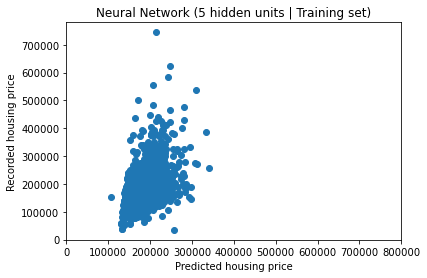

mse: 4318722030.422832
r2: 0.2759350235232644


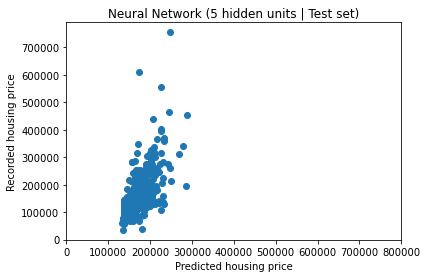

mse: 5546806891.847984
r2: -5.394199426902603
Epoch 1/300
59/59 [==============================] - 0s 1ms/step - loss: 38795550720.0000
Epoch 2/300
59/59 [==============================] - 0s 1ms/step - loss: 37079142400.0000
Epoch 3/300
59/59 [==============================] - 0s 1ms/step - loss: 25798617088.0000
Epoch 4/300
59/59 [==============================] - 0s 1ms/step - loss: 7744205824.0000
Epoch 5/300
59/59 [==============================] - 0s 1ms/step - loss: 5669212672.0000
Epoch 6/300
59/59 [==============================] - 0s 1ms/step - loss: 5619914752.0000
Epoch 7/300
59/59 [==============================] - 0s 1ms/step - loss: 5596943872.0000
Epoch 8/300
59/59 [==============================] - 0s 1ms/step - loss: 5554378240.0000
Epoch 9/300
59/59 [==============================] - 0s 1ms/step - loss: 5521358336.0000
Epoch 10/300
59/59 [==============================] - 0s 1ms/step - loss: 5488651264.0000
Epoch 11/300
59/59 [==============================] - 0s 1ms

59/59 [==============================] - 0s 1ms/step - loss: 3956743680.0000
Epoch 92/300
59/59 [==============================] - 0s 1ms/step - loss: 3915248640.0000
Epoch 93/300
59/59 [==============================] - 0s 1ms/step - loss: 3869004288.0000
Epoch 94/300
59/59 [==============================] - 0s 1ms/step - loss: 3838591744.0000
Epoch 95/300
59/59 [==============================] - 0s 1ms/step - loss: 3814177792.0000
Epoch 96/300
59/59 [==============================] - 0s 1ms/step - loss: 3798275840.0000
Epoch 97/300
59/59 [==============================] - 0s 1ms/step - loss: 3729058304.0000
Epoch 98/300
59/59 [==============================] - 0s 1ms/step - loss: 3717292544.0000
Epoch 99/300
59/59 [==============================] - 0s 1ms/step - loss: 3660888576.0000
Epoch 100/300
59/59 [==============================] - 0s 1ms/step - loss: 3619721216.0000
Epoch 101/300
59/59 [==============================] - 0s 1ms/step - loss: 3595885568.0000
Epoch 102/300
59/59 [

59/59 [==============================] - 0s 1ms/step - loss: 1512542336.0000
Epoch 182/300
59/59 [==============================] - 0s 2ms/step - loss: 1491197440.0000
Epoch 183/300
59/59 [==============================] - 0s 1ms/step - loss: 1506625536.0000
Epoch 184/300
59/59 [==============================] - 0s 1ms/step - loss: 1504374912.0000
Epoch 185/300
59/59 [==============================] - 0s 1ms/step - loss: 1503740544.0000
Epoch 186/300
59/59 [==============================] - 0s 1ms/step - loss: 1507691392.0000
Epoch 187/300
59/59 [==============================] - 0s 1ms/step - loss: 1495942400.0000
Epoch 188/300
59/59 [==============================] - 0s 1ms/step - loss: 1464228096.0000
Epoch 189/300
59/59 [==============================] - 0s 1ms/step - loss: 1567708544.0000
Epoch 190/300
59/59 [==============================] - 0s 1ms/step - loss: 1458972928.0000
Epoch 191/300
59/59 [==============================] - 0s 1ms/step - loss: 1479349120.0000
Epoch 192/300

59/59 [==============================] - 0s 1ms/step - loss: 1170508288.0000
Epoch 272/300
59/59 [==============================] - 0s 1ms/step - loss: 1171184384.0000
Epoch 273/300
59/59 [==============================] - 0s 1ms/step - loss: 1134982400.0000
Epoch 274/300
59/59 [==============================] - 0s 1ms/step - loss: 1136235904.0000
Epoch 275/300
59/59 [==============================] - 0s 1ms/step - loss: 1170728320.0000
Epoch 276/300
59/59 [==============================] - 0s 1ms/step - loss: 1125257216.0000
Epoch 277/300
59/59 [==============================] - 0s 1ms/step - loss: 1168021248.0000
Epoch 278/300
59/59 [==============================] - 0s 1ms/step - loss: 1136456832.0000
Epoch 279/300
59/59 [==============================] - 0s 1ms/step - loss: 1125505920.0000
Epoch 280/300
59/59 [==============================] - 0s 1ms/step - loss: 1138640640.0000
Epoch 281/300
59/59 [==============================] - 0s 1ms/step - loss: 1142217344.0000
Epoch 282/300

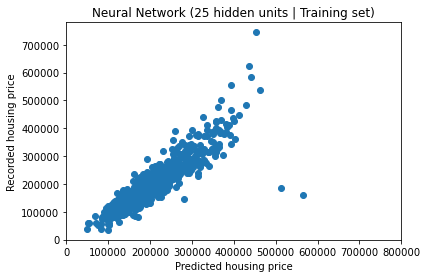

mse: 1112838280.435232
r2: 0.8134246155067181


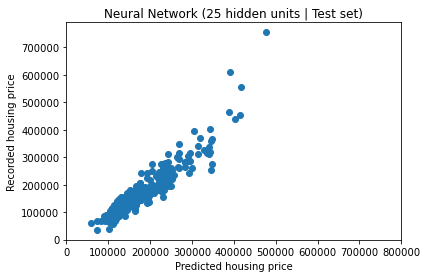

mse: 1262718847.9448996
r2: 0.7324101548426305
Epoch 1/300
59/59 [==============================] - 0s 2ms/step - loss: 31022608384.0000
Epoch 2/300
59/59 [==============================] - 0s 2ms/step - loss: 5958107136.0000
Epoch 3/300
59/59 [==============================] - 0s 2ms/step - loss: 5637989888.0000
Epoch 4/300
59/59 [==============================] - 0s 2ms/step - loss: 5499414528.0000
Epoch 5/300
59/59 [==============================] - 0s 2ms/step - loss: 5378307584.0000
Epoch 6/300
59/59 [==============================] - 0s 2ms/step - loss: 5326927872.0000
Epoch 7/300
59/59 [==============================] - 0s 2ms/step - loss: 5201810432.0000
Epoch 8/300
59/59 [==============================] - 0s 2ms/step - loss: 5115953152.0000
Epoch 9/300
59/59 [==============================] - 0s 2ms/step - loss: 5044948480.0000
Epoch 10/300
59/59 [==============================] - 0s 2ms/step - loss: 4995287040.0000
Epoch 11/300
59/59 [==============================] - 0s 2ms/

59/59 [==============================] - 0s 2ms/step - loss: 1275591936.0000
Epoch 92/300
59/59 [==============================] - 0s 2ms/step - loss: 1232994304.0000
Epoch 93/300
59/59 [==============================] - 0s 2ms/step - loss: 1208006528.0000
Epoch 94/300
59/59 [==============================] - 0s 2ms/step - loss: 1388703872.0000
Epoch 95/300
59/59 [==============================] - 0s 2ms/step - loss: 1245436416.0000
Epoch 96/300
59/59 [==============================] - 0s 2ms/step - loss: 1266613760.0000
Epoch 97/300
59/59 [==============================] - 0s 2ms/step - loss: 1340135168.0000
Epoch 98/300
59/59 [==============================] - 0s 2ms/step - loss: 1309746048.0000
Epoch 99/300
59/59 [==============================] - 0s 2ms/step - loss: 1283468160.0000
Epoch 100/300
59/59 [==============================] - 0s 2ms/step - loss: 1185620480.0000
Epoch 101/300
59/59 [==============================] - 0s 2ms/step - loss: 1249492608.0000
Epoch 102/300
59/59 [

59/59 [==============================] - 0s 2ms/step - loss: 981905920.0000
Epoch 182/300
59/59 [==============================] - 0s 2ms/step - loss: 971697920.0000
Epoch 183/300
59/59 [==============================] - 0s 2ms/step - loss: 1025713792.0000
Epoch 184/300
59/59 [==============================] - 0s 2ms/step - loss: 977067456.0000
Epoch 185/300
59/59 [==============================] - 0s 2ms/step - loss: 1023212224.0000
Epoch 186/300
59/59 [==============================] - 0s 3ms/step - loss: 1140959232.0000
Epoch 187/300
59/59 [==============================] - 0s 2ms/step - loss: 1046979264.0000
Epoch 188/300
59/59 [==============================] - 0s 2ms/step - loss: 985350144.0000
Epoch 189/300
59/59 [==============================] - 0s 2ms/step - loss: 997177280.0000
Epoch 190/300
59/59 [==============================] - 0s 2ms/step - loss: 1029404032.0000
Epoch 191/300
59/59 [==============================] - 0s 2ms/step - loss: 1051663680.0000
Epoch 192/300
59/5

59/59 [==============================] - 0s 2ms/step - loss: 947812352.0000
Epoch 272/300
59/59 [==============================] - 0s 2ms/step - loss: 952958720.0000
Epoch 273/300
59/59 [==============================] - 0s 2ms/step - loss: 896554880.0000
Epoch 274/300
59/59 [==============================] - 0s 2ms/step - loss: 919520576.0000
Epoch 275/300
59/59 [==============================] - 0s 2ms/step - loss: 980310016.0000
Epoch 276/300
59/59 [==============================] - 0s 2ms/step - loss: 948405248.0000
Epoch 277/300
59/59 [==============================] - 0s 2ms/step - loss: 989453632.0000
Epoch 278/300
59/59 [==============================] - 0s 2ms/step - loss: 974378496.0000
Epoch 279/300
59/59 [==============================] - 0s 2ms/step - loss: 946508864.0000
Epoch 280/300
59/59 [==============================] - 0s 2ms/step - loss: 922395968.0000
Epoch 281/300
59/59 [==============================] - 0s 2ms/step - loss: 932352256.0000
Epoch 282/300
59/59 [===

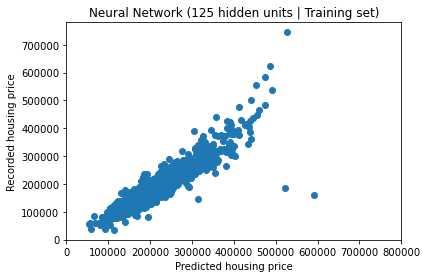

mse: 1448272847.4993837
r2: 0.7571865848578666


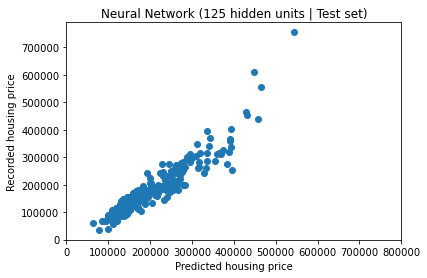

mse: 1462360547.1204298
r2: 0.7656728577281939
Epoch 1/300
59/59 [==============================] - 1s 2ms/step - loss: 22039912448.0000
Epoch 2/300
59/59 [==============================] - 0s 2ms/step - loss: 5646856704.0000
Epoch 3/300
59/59 [==============================] - 0s 2ms/step - loss: 5476754944.0000
Epoch 4/300
59/59 [==============================] - 0s 2ms/step - loss: 5334662656.0000
Epoch 5/300
59/59 [==============================] - 0s 2ms/step - loss: 5239575552.0000
Epoch 6/300
59/59 [==============================] - 0s 2ms/step - loss: 5129137152.0000
Epoch 7/300
59/59 [==============================] - 0s 2ms/step - loss: 4959776768.0000
Epoch 8/300
59/59 [==============================] - 0s 2ms/step - loss: 4945330176.0000
Epoch 9/300
59/59 [==============================] - 0s 2ms/step - loss: 4884959232.0000
Epoch 10/300
59/59 [==============================] - 0s 2ms/step - loss: 4914190848.0000
Epoch 11/300
59/59 [==============================] - 0s 2ms/

59/59 [==============================] - 0s 2ms/step - loss: 1197601536.0000
Epoch 92/300
59/59 [==============================] - 0s 2ms/step - loss: 1113183104.0000
Epoch 93/300
59/59 [==============================] - 0s 2ms/step - loss: 1255726464.0000
Epoch 94/300
59/59 [==============================] - 0s 2ms/step - loss: 1458763904.0000
Epoch 95/300
59/59 [==============================] - 0s 2ms/step - loss: 1126840960.0000
Epoch 96/300
59/59 [==============================] - 0s 2ms/step - loss: 1199984640.0000
Epoch 97/300
59/59 [==============================] - 0s 2ms/step - loss: 1069694400.0000
Epoch 98/300
59/59 [==============================] - 0s 2ms/step - loss: 1189294592.0000
Epoch 99/300
59/59 [==============================] - 0s 2ms/step - loss: 1206259200.0000
Epoch 100/300
59/59 [==============================] - 0s 2ms/step - loss: 1250180992.0000
Epoch 101/300
59/59 [==============================] - 0s 2ms/step - loss: 1226725632.0000
Epoch 102/300
59/59 [

59/59 [==============================] - 0s 2ms/step - loss: 1007832128.0000
Epoch 182/300
59/59 [==============================] - 0s 2ms/step - loss: 1038648896.0000
Epoch 183/300
59/59 [==============================] - 0s 2ms/step - loss: 1006738688.0000
Epoch 184/300
59/59 [==============================] - 0s 2ms/step - loss: 918100480.0000
Epoch 185/300
59/59 [==============================] - 0s 2ms/step - loss: 1265207552.0000
Epoch 186/300
59/59 [==============================] - 0s 2ms/step - loss: 1023489600.0000
Epoch 187/300
59/59 [==============================] - 0s 2ms/step - loss: 941567168.0000
Epoch 188/300
59/59 [==============================] - 0s 2ms/step - loss: 1002930944.0000
Epoch 189/300
59/59 [==============================] - 0s 2ms/step - loss: 956327680.0000
Epoch 190/300
59/59 [==============================] - 0s 3ms/step - loss: 994904832.0000
Epoch 191/300
59/59 [==============================] - 0s 2ms/step - loss: 1042992768.0000
Epoch 192/300
59/

59/59 [==============================] - 0s 3ms/step - loss: 932420288.0000
Epoch 272/300
59/59 [==============================] - 0s 3ms/step - loss: 925521600.0000
Epoch 273/300
59/59 [==============================] - 0s 2ms/step - loss: 965288192.0000
Epoch 274/300
59/59 [==============================] - 0s 2ms/step - loss: 1037985216.0000
Epoch 275/300
59/59 [==============================] - 0s 2ms/step - loss: 953795264.0000
Epoch 276/300
59/59 [==============================] - 0s 3ms/step - loss: 1026010880.0000
Epoch 277/300
59/59 [==============================] - 0s 3ms/step - loss: 996900160.0000
Epoch 278/300
59/59 [==============================] - 0s 3ms/step - loss: 1006864128.0000
Epoch 279/300
59/59 [==============================] - 0s 3ms/step - loss: 963734400.0000
Epoch 280/300
59/59 [==============================] - 0s 3ms/step - loss: 949264640.0000
Epoch 281/300
59/59 [==============================] - 0s 3ms/step - loss: 1001953728.0000
Epoch 282/300
59/59 

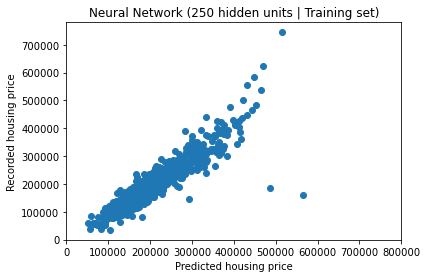

mse: 880649866.5107416
r2: 0.8523526820231793


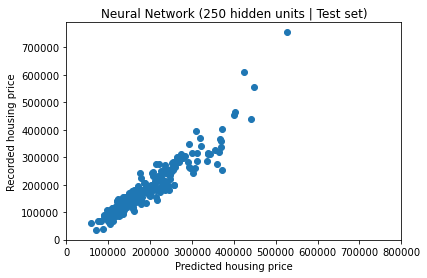

mse: 1010904192.706553
r2: 0.8160219527333958
Epoch 1/300
59/59 [==============================] - 1s 9ms/step - loss: 16222864384.0000
Epoch 2/300
59/59 [==============================] - 0s 7ms/step - loss: 5668632064.0000
Epoch 3/300
59/59 [==============================] - 0s 6ms/step - loss: 5409896448.0000
Epoch 4/300
59/59 [==============================] - 0s 8ms/step - loss: 5147479552.0000
Epoch 5/300
59/59 [==============================] - 0s 7ms/step - loss: 4992045056.0000
Epoch 6/300
59/59 [==============================] - 0s 7ms/step - loss: 5005781504.0000
Epoch 7/300
59/59 [==============================] - 0s 7ms/step - loss: 4868076544.0000
Epoch 8/300
59/59 [==============================] - 0s 6ms/step - loss: 4810144768.0000
Epoch 9/300
59/59 [==============================] - 0s 5ms/step - loss: 4742513152.0000
Epoch 10/300
59/59 [==============================] - 0s 6ms/step - loss: 4702020608.0000
Epoch 11/300
59/59 [==============================] - 0s 6ms/s

59/59 [==============================] - 0s 6ms/step - loss: 1242000512.0000
Epoch 92/300
59/59 [==============================] - 0s 5ms/step - loss: 1113526272.0000
Epoch 93/300
59/59 [==============================] - 0s 5ms/step - loss: 1195889536.0000
Epoch 94/300
59/59 [==============================] - 0s 5ms/step - loss: 1091788288.0000
Epoch 95/300
59/59 [==============================] - 0s 7ms/step - loss: 1142949248.0000
Epoch 96/300
59/59 [==============================] - 0s 7ms/step - loss: 1091288576.0000
Epoch 97/300
59/59 [==============================] - 1s 9ms/step - loss: 1127235968.0000
Epoch 98/300
59/59 [==============================] - 0s 8ms/step - loss: 1052194624.0000
Epoch 99/300
59/59 [==============================] - 0s 7ms/step - loss: 1107858048.0000
Epoch 100/300
59/59 [==============================] - 1s 9ms/step - loss: 1077980672.0000
Epoch 101/300
59/59 [==============================] - 1s 9ms/step - loss: 1165345920.0000
Epoch 102/300
59/59 [

59/59 [==============================] - 0s 7ms/step - loss: 1143284608.0000
Epoch 182/300
59/59 [==============================] - 0s 7ms/step - loss: 1049003328.0000
Epoch 183/300
59/59 [==============================] - 0s 8ms/step - loss: 1067071168.0000
Epoch 184/300
59/59 [==============================] - 0s 6ms/step - loss: 968687872.0000
Epoch 185/300
59/59 [==============================] - 0s 7ms/step - loss: 951445120.0000
Epoch 186/300
59/59 [==============================] - 0s 6ms/step - loss: 983155904.0000
Epoch 187/300
59/59 [==============================] - 0s 6ms/step - loss: 941973248.0000
Epoch 188/300
59/59 [==============================] - 0s 7ms/step - loss: 1018322048.0000
Epoch 189/300
59/59 [==============================] - 0s 7ms/step - loss: 1247133696.0000
Epoch 190/300
59/59 [==============================] - 0s 8ms/step - loss: 1069241600.0000
Epoch 191/300
59/59 [==============================] - 0s 8ms/step - loss: 958987840.0000
Epoch 192/300
59/5

59/59 [==============================] - 0s 6ms/step - loss: 884205248.0000
Epoch 272/300
59/59 [==============================] - 0s 5ms/step - loss: 878301760.0000
Epoch 273/300
59/59 [==============================] - 0s 5ms/step - loss: 945094400.0000
Epoch 274/300
59/59 [==============================] - 0s 5ms/step - loss: 847605760.0000
Epoch 275/300
59/59 [==============================] - 0s 5ms/step - loss: 879820672.0000
Epoch 276/300
59/59 [==============================] - 0s 5ms/step - loss: 904342208.0000
Epoch 277/300
59/59 [==============================] - 0s 7ms/step - loss: 1006123840.0000
Epoch 278/300
59/59 [==============================] - 0s 5ms/step - loss: 838853952.0000
Epoch 279/300
59/59 [==============================] - 0s 5ms/step - loss: 847329856.0000
Epoch 280/300
59/59 [==============================] - 0s 5ms/step - loss: 971049728.0000
Epoch 281/300
59/59 [==============================] - 0s 5ms/step - loss: 927874240.0000
Epoch 282/300
59/59 [==

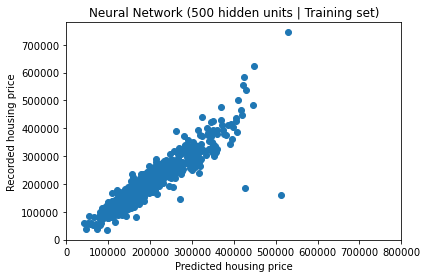

mse: 765537130.3119199
r2: 0.8716521646110439


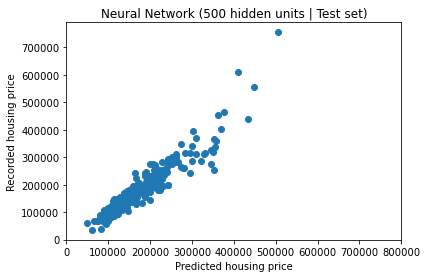

mse: 1042396284.0093489
r2: 0.7996309490671446


In [22]:
# Polynomial Regression caps the r2 value of prediction at around 0.88, let's see if neural network can perform better

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score

X_train, X_test = X_train_copy, X_test_copy

# Experimenting with the optimal amount of hidden units per layer

units_list = [5, 25, 125, 250, 500]

for hidden_units in units_list:
    
    model = Sequential()
    
    model.add(Dense(hidden_units, activation='relu'))
    
    model.add(Dense(hidden_units, activation='relu'))

    model.add(Dense(hidden_units, activation='relu'))
    
    model.add(Dense(1))

    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    # Fitting the model
    
    model.fit(
        X_train, 
        y_train, 
        epochs=300, 
        batch_size=20
    )
    
    # Evaluating the performance on training set
    
    train_pred = model.predict(X_train)
    
    plt.scatter(train_pred, y_train)
    plt.title(f"Neural Network ({hidden_units} hidden units | Training set)")
    plt.xlabel("Predicted housing price")
    plt.ylabel("Recorded housing price")
    plt.xlim(0, 800000)
    plt.show()
    
    mse = mean_squared_error(train_pred, y_train)
    print("mse:", mse)
    r2 = r2_score(y_train, train_pred)
    print("r2:", r2)
    
    
    # Evaluating the performance on test set
    
    y_pred = model.predict(X_test)
    
    plt.scatter(y_pred, y_test)
    plt.title(f"Neural Network ({hidden_units} hidden units | Test set)")
    plt.xlabel("Predicted housing price")
    plt.ylabel("Recorded housing price")
    plt.xlim(0, 800000)
    plt.show()
        
    mse = mean_squared_error(y_test, y_pred)
    print("mse:", mse)
    r2 = r2_score(y_pred, y_test)
    print("r2:", r2)
    ML_algorithms.append(f'neural network ({hidden_units} hidden units | 3 layers): r2 = {r2}')

    

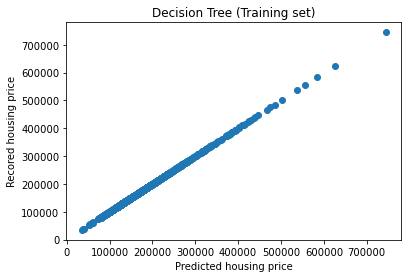

mse: 29490.58219178082
r2: 0.9999950556906533


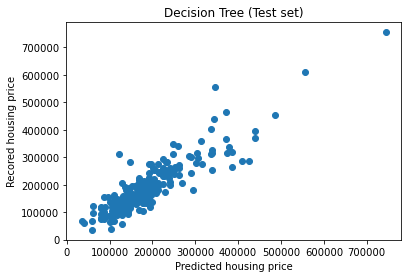

mse: 1567019510.8321917
r2: 0.7957036678096052


In [23]:
# Construction and evaluation of the decision tree model

from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state = 42)

tree_regressor.fit(X_train, y_train)

# Training set

train_pred = tree_regressor.predict(X_train)

plt.scatter(train_pred, y_train)
plt.xlabel("Predicted housing price")
plt.ylabel("Recored housing price")
plt.title("Decision Tree (Training set)")

plt.show()

mse = mean_squared_error(y_train, train_pred)
print("mse:", mse)
r2 = tree_regressor.score(X_train, y_train)
print("r2:", r2)

# Test set

y_pred = tree_regressor.predict(X_test)

plt.scatter(y_pred, y_test)
plt.xlabel("Predicted housing price")
plt.ylabel("Recored housing price")
plt.title("Decision Tree (Test set)")

plt.show()

mse = mean_squared_error(y_test, y_pred)
print("mse:", mse)
r2 = tree_regressor.score(X_test, y_test)
print("r2:", r2)
ML_algorithms.append(f'decision tree (unrestricted): r2 = {r2}')



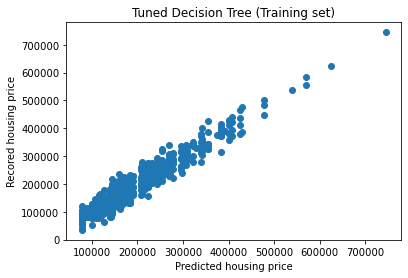

mse: 446041728.3430305
r2: 0.925217878977796


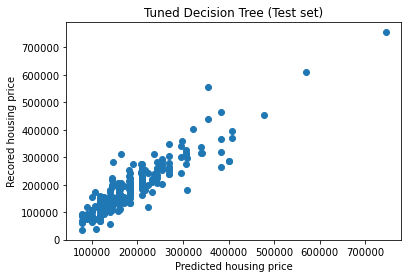

mse: 1320446144.6969767
r2: 0.8278500667338354


In [24]:
# Tune the decision tree based on optimised parameters and evaluate performance on the test set

tree_regressor = DecisionTreeRegressor(max_depth = 30,
                                       max_leaf_nodes = 70,
                                       max_features = "auto")

tree_regressor.fit(X_train, y_train)

# Training set

train_pred = tree_regressor.predict(X_train)

plt.scatter(train_pred, y_train)
plt.xlabel("Predicted housing price")
plt.ylabel("Recored housing price")
plt.title("Tuned Decision Tree (Training set)")

plt.show()

mse = mean_squared_error(y_train, train_pred)
print("mse:", mse)
r2 = tree_regressor.score(X_train, y_train)
print("r2:", r2)

# Test set

y_pred = tree_regressor.predict(X_test)

plt.scatter(y_pred, y_test)
plt.xlabel("Predicted housing price")
plt.ylabel("Recored housing price")
plt.title("Tuned Decision Tree (Test set)")

plt.show()

mse = mean_squared_error(y_test, y_pred)
print("mse:", mse)
r2 = tree_regressor.score(X_test, y_test)
print("r2:", r2)
ML_algorithms.append(f'decision tree (restricted): r2 = {r2}')


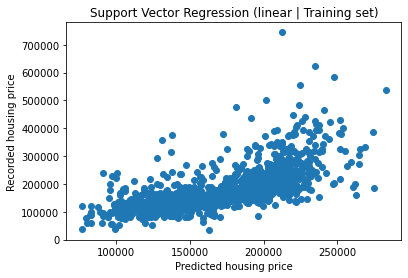

r2: 0.4168534617004701
mse: 3478206906.476313


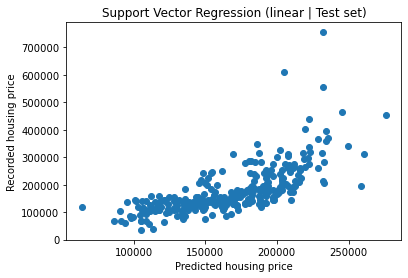

r2: 0.4063570706118418
mse: 4553434918.997326


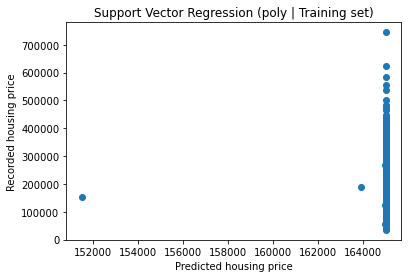

r2: -0.04526030150314364
mse: 6234507728.289602


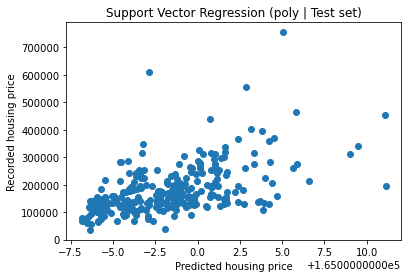

r2: -0.024937969801338555
mse: 7861608570.508374


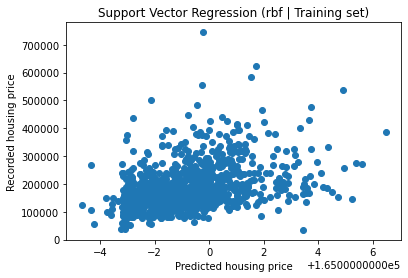

r2: -0.045308682454339166
mse: 6234796298.910429


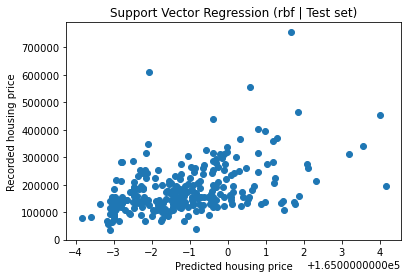

r2: -0.02496091180135407
mse: 7861784543.132338


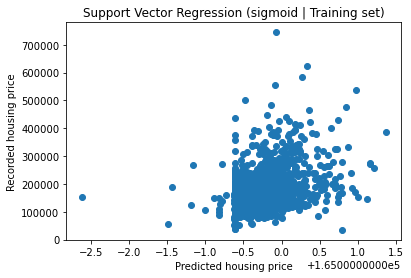

r2: -0.04531950743472413
mse: 6234860865.051295


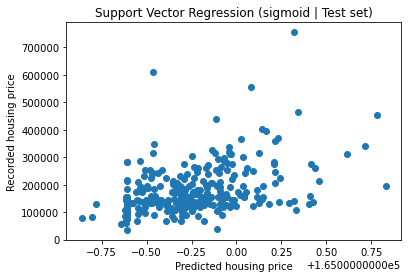

r2: -0.024969746128889136
mse: 7861852305.306353


In [25]:
# Support Vector Machines (SVM) regression

from sklearn.svm import SVR

# Tune the choice of kernel

kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    
    SVR_regressor = SVR(kernel = kernel, degree = 4)

    SVR_regressor.fit(X_train, y_train)

    # Training set

    train_pred = SVR_regressor.predict(X_train)

    plt.scatter(train_pred, y_train)
    plt.xlabel("Predicted housing price")
    plt.ylabel("Recorded housing price")
    plt.title(f"Support Vector Regression ({kernel} | Training set)")
    plt.show()

    r2 = SVR_regressor.score(X_train, y_train)
    mse = mean_squared_error(train_pred, y_train)

    print("r2:", r2)
    print("mse:", mse)

    # Test set

    y_pred = SVR_regressor.predict(X_test)

    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted housing price")
    plt.ylabel("Recorded housing price")
    plt.title(f"Support Vector Regression ({kernel} | Test set)")
    plt.show()

    r2 = SVR_regressor.score(X_test, y_test)
    mse = mean_squared_error(y_pred, y_test)

    print("r2:", r2)
    print("mse:", mse)
    
    ML_algorithms.append(f'SVR w {kernel}: r2 = {r2}')


In [26]:
for algorithms in ML_algorithms:
    print (algorithms)

linear regression (w Pool Attributes): r2 = 0.828068916896793
linear regression : r2 = 0.8674990904411798
polynomial regression (Degree2): r2 = 0.8576694570054582
polynomial regression (Degree3): r2 = 0.860934031960767
polynomial regression (Degree4): r2 = 0.8775936891664484
polynomial regression (Degree5): r2 = 0.879055790688581
polynomial regression (Degree6): r2 = 0.8799551618436808
polynomial regression (Degree7): r2 = 0.8798221671209544
neural network (5 hidden units | 3 layers): r2 = -5.394199426902603
neural network (25 hidden units | 3 layers): r2 = 0.7324101548426305
neural network (125 hidden units | 3 layers): r2 = 0.7656728577281939
neural network (250 hidden units | 3 layers): r2 = 0.8160219527333958
neural network (500 hidden units | 3 layers): r2 = 0.7996309490671446
decision tree (unrestricted): r2 = 0.7957036678096052
decision tree (restricted): r2 = 0.8278500667338354
SVR w linear: r2 = 0.4063570706118418
SVR w poly: r2 = -0.024937969801338555
SVR w rbf: r2 = -0.02496

In [27]:
# Underperformance in the SVR model may be caused by categorical data that are highly imbalanced

# Based on r2 value polynomial regression seems to be the best option

# Use all our data to train the polynomial regression model with degree = 6

X = X_copy

poly_degree = 6

scaler = StandardScaler()

for degree in range(2, poly_degree + 1):
    numeric_list = []
    for column in numeric_columns:
        X[f'{column}^{degree}'] = X_numeric[column] ** degree
        numeric_list.append(f'{column}^{degree}')
        
    X[numeric_list] = scaler.fit_transform(X[numeric_list]) 
    
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [28]:
# perform the same data wrangling on the test data

X = X_copy1

test_df = pd.read_csv("test.csv")

test = test_df["Id"]

selected_columns = ['MSSubClass', 'LotArea', 'Alley', 'Utilities', 'Neighborhood', 'Condition1', 'Condition2',
                   'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                    'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'TotRmsAbvGrd',
                   'Functional', 'FireplaceQu', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                    'ScreenPorch', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']

test_df = test_df.loc[:, selected_columns]

porch_columns = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

test_df["PorchArea"] = test_df.loc[:, porch_columns].sum(axis=1)

test_df.drop(columns = porch_columns, inplace = True)

test_df.drop(columns = ['Fence', 'Alley', 'FireplaceQu'], inplace = True)

test_df["GardenArea"] = test_df["LotArea"] - test_df["1stFlrSF"]

test_df.drop(columns = ["LotArea"], inplace = True)
        
test_df.drop(columns = ["MSSubClass"], inplace = True)

test_df["IndoorArea"] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

test_df.drop(columns = ['1stFlrSF', '2ndFlrSF'], inplace = True)

test_df["CentralAir"] = test_df["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)

multivar_columns = ["Utilities", "Neighborhood", "Condition1", "Condition2", "HouseStyle", 
                    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", 
                    "Functional", "GarageQual", "SaleType"]

for column in multivar_columns:
    category_list = list(X[column].value_counts().index)
    print(category_list)
    for category in category_list:
        test_df[column + category] = (test_df[column] == category).astype(int)
        
test_df.drop(columns = multivar_columns, inplace = True)

test_df[numeric_columns] = scaler.fit_transform(test_df[numeric_columns])

poly_degree = 6

for degree in range(2, poly_degree + 1):
    numeric_list = []
    for column in numeric_columns:
        test_df[f'{column}^{degree}'] = X_numeric[column] ** degree
        numeric_list.append(f'{column}^{degree}')
    
    test_df[numeric_list] = scaler.fit_transform(test_df[numeric_list]) 




['AllPub', 'NoSeWa']
['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste']
['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe']
['Norm', 'Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe']
['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin']
['TA', 'Gd', 'Ex', 'Fa']
['TA', 'Gd', 'Fa', 'Ex', 'Po']
['TA', 'Gd', 'Ex', 'Fa']
['TA', 'Gd', 'Fa', 'Po']
['Ex', 'TA', 'Gd', 'Fa', 'Po']
['TA', 'Gd', 'Ex', 'Fa']
['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev']
['TA', 'Fa', 'Gd', 'Ex', 'Po']
['WD', 'New', 'COD', 'ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con']


/var/folders/x0/x0xdjkzs0zbclzn30ldtpcy00000gn/T/ipykernel_87860/624525860.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[column + category] = (test_df[column] == category).astype(int)
/var/folders/x0/x0xdjkzs0zbclzn30ldtpcy00000gn/T/ipykernel_87860/624525860.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[column + category] = (test_df[column] == category).astype(int)


In [29]:
predictions = lm.predict(test_df)

In [42]:
predictions = pd.Series(predictions)

predictions_df = pd.concat([test, predictions], axis = 1)
predictions_df.columns = ["Id", "SalePrice"]

In [43]:
predictions_df.set_index("Id", inplace = True)

predictions_df.to_csv("predictions.csv")